# 2. mrcc_extraction.ipynb
This notebook focuses on extracting and visualizing [MFCCs (Mel Frequency Cepstral Coefficients)](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum).

## Imports and setup

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Path to a sample audio file
SAMPLE_FILE = "../data/raw/03-01-04-01-01-02-01.wav"

## 2.1. Extract and plot MFCCs

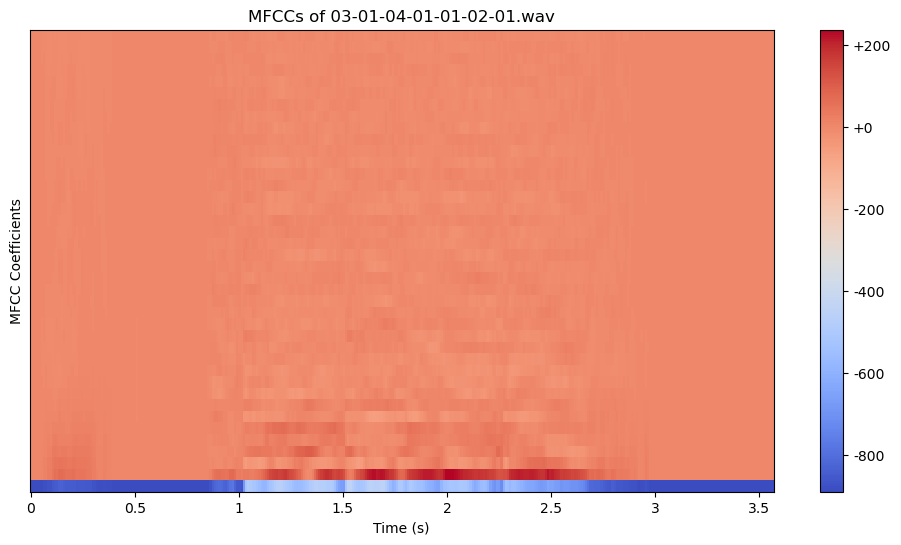

In [8]:
# Load the audio file
signal, sr = librosa.load(SAMPLE_FILE, sr=None)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)

# Plot MFCCs
plt.figure(figsize=(12, 6))
plt.title(f"MFCCs of {SAMPLE_FILE.split('/')[-1]}")
librosa.display.specshow(mfccs, sr=sr, x_axis="time", cmap="coolwarm")
plt.colorbar(format="%+2.0f")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()

## 2.2. Compare the MFCCs accross different emotions

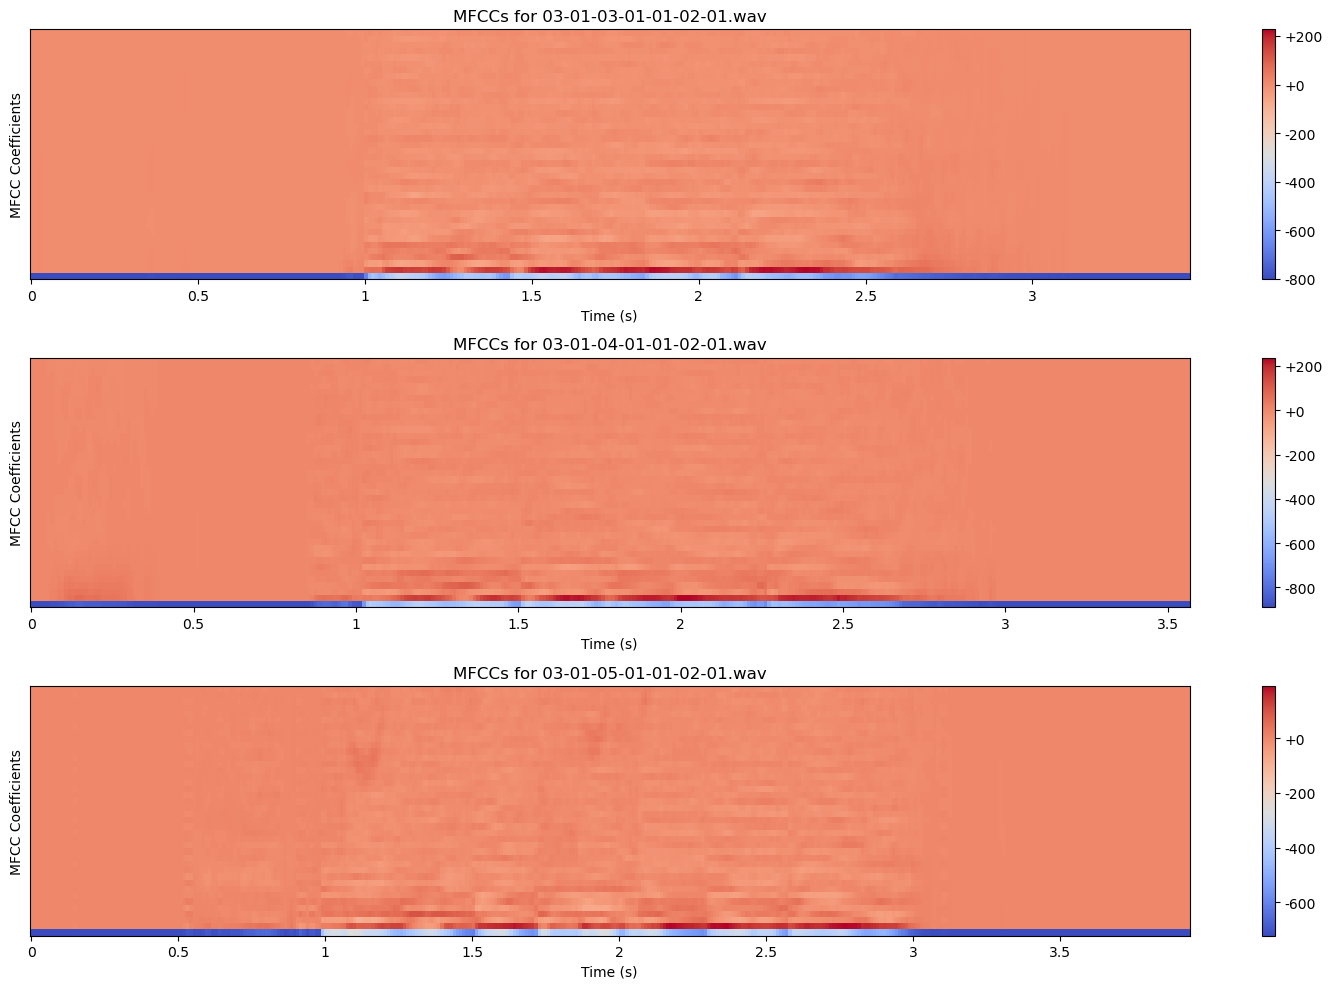

In [9]:
# Load audio files for comparison
files_to_compare = [
    "../data/raw/03-01-03-01-01-02-01.wav",  # Happy
    "../data/raw/03-01-04-01-01-02-01.wav",  # Sad
    "../data/raw/03-01-05-01-01-02-01.wav",  # Angry
]

plt.figure(figsize=(15, 10))
for i, file in enumerate(files_to_compare):
    signal, sr = librosa.load(file, sr=None)
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)

    plt.subplot(3, 1, i + 1)
    librosa.display.specshow(mfccs, sr=sr, x_axis="time", cmap="coolwarm")
    plt.colorbar(format="%+2.0f")
    plt.title(f"MFCCs for {file.split('/')[-1]}")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")

plt.tight_layout()
plt.show()

## 2.3. Average MFCCs over time
Compute the average MFCCs for each coefficient over time for further analysis.

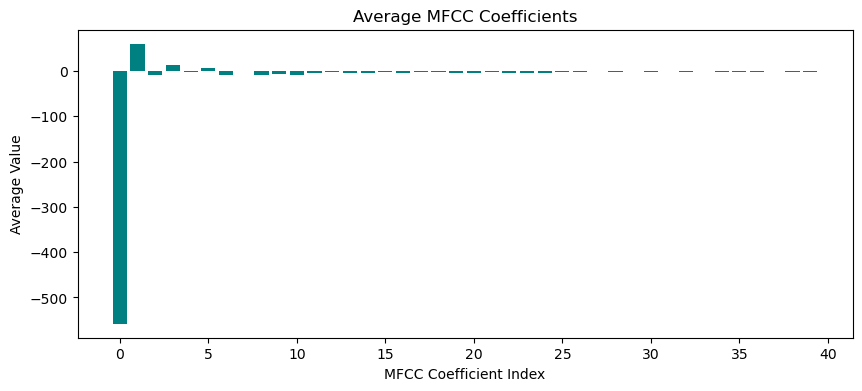

In [10]:
avg_mfccs = np.mean(mfccs, axis=1)

plt.figure(figsize=(10, 4))
plt.bar(range(len(avg_mfccs)), avg_mfccs, color="teal")
plt.title("Average MFCC Coefficients")
plt.xlabel("MFCC Coefficient Index")
plt.ylabel("Average Value")
plt.show()

## 2.4. Save MFCCs to File
To avoid re-extracting MFCCs during training:

In [13]:
import os
import pickle

# Path to the dataset
DATASET_DIR = "../data/raw/"
OUTPUT_DIR = "../data/processed/"

file_names = [f for f in os.listdir(DATASET_DIR) if f.endswith(".wav")]

# Extract and save MFCCs
mfcc_features = {}
for file in file_names:
    file_path = os.path.join(DATASET_DIR, file)
    mfccs = librosa.feature.mfcc(y=librosa.load(file_path, sr=None)[0], sr=sr, n_mfcc=40)
    mfcc_features[file] = mfccs

# Save as a pickle file
with open(os.path.join(OUTPUT_DIR, "mfcc_features.pkl"), "wb") as f:
    pickle.dump(mfcc_features, f)